In [1]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-logging'])
wd = webdriver.Chrome('./chromedriver.exe', options=options)

C:\Users\admin\AppData\Local\Temp\ipykernel_12568\2950996752.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe', options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [4]:
# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [5]:
# TIP!
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [7]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [8]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

(name, address, place)

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [9]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [10]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [11]:
gu_list = list(set(df_star["구"]))
gu_list

['강동구',
 '구로구',
 '성북구',
 '금천구',
 '송파구',
 '동작구',
 '강남구',
 '강북구',
 '마포구',
 '노원구',
 '광진구',
 '동대문구',
 '영등포구',
 '양천구',
 '관악구',
 '중구',
 '서대문구',
 '용산구',
 '서초구',
 '강서구',
 '종로구',
 '도봉구',
 '성동구',
 '중랑구',
 '은평구']

In [13]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome("./chromedriver.exe", options=options)
driver.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_12568\1177500784.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./chromedriver.exe", options=options)


In [15]:
# 이건 안됨
wd.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element(By.XPATH, '//*[@id="keyword"]').clear
wd.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = wd.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')
info

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a"}
  (Session info: chrome=104.0.5112.81)
Stacktrace:
Backtrace:
	Ordinal0 [0x010778B3+2193587]
	Ordinal0 [0x01010681+1771137]
	Ordinal0 [0x00F241A8+803240]
	Ordinal0 [0x00F524A0+992416]
	Ordinal0 [0x00F5273B+993083]
	Ordinal0 [0x00F7F7C2+1177538]
	Ordinal0 [0x00F6D7F4+1103860]
	Ordinal0 [0x00F7DAE2+1170146]
	Ordinal0 [0x00F6D5C6+1103302]
	Ordinal0 [0x00F477E0+948192]
	Ordinal0 [0x00F486E6+952038]
	GetHandleVerifier [0x01320CB2+2738370]
	GetHandleVerifier [0x013121B8+2678216]
	GetHandleVerifier [0x011017AA+512954]
	GetHandleVerifier [0x01100856+509030]
	Ordinal0 [0x0101743B+1799227]
	Ordinal0 [0x0101BB68+1817448]
	Ordinal0 [0x0101BC55+1817685]
	Ordinal0 [0x01025230+1856048]
	BaseThreadInitThunk [0x76ADFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77007A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77007A6E+238]


In [16]:
edi_info = []

for gu in gu_list:
    driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
            
        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

692

In [17]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
687,중랑교차로점,중랑구,서울 중랑구 동일로 683 (면목동)
688,중랑역점,중랑구,서울 중랑구 망우로 198 (상봉동)
689,중화동점,중랑구,서울 중랑구 동일로129길 1 (중화동)
690,중화역점,중랑구,"서울 중랑구 동일로 815, 1층"
691,화랑대역점,중랑구,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)"


In [18]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,강동구,17
1,구로구,12
2,성북구,15
3,금천구,13
4,송파구,34
5,동작구,11
6,강남구,89
7,강북구,6
8,마포구,35
9,노원구,13


In [19]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,강동구,27
1,구로구,28
2,성북구,32
3,금천구,23
4,송파구,39
5,동작구,22
6,강남구,44
7,강북구,20
8,마포구,38
9,노원구,31


In [20]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,강동구,27,17,10
1,구로구,28,12,16
2,성북구,32,15,17
3,금천구,23,13,10
4,송파구,39,34,5
5,동작구,22,11,11
6,강남구,44,89,-45
7,강북구,20,6,14
8,마포구,38,35,3
9,노원구,31,13,18


In [12]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\admin\AppData\Local\Temp\ipykernel_12568\3681494351.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [ ]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [29]:
# 음수 마이너스표시가 깨질때
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

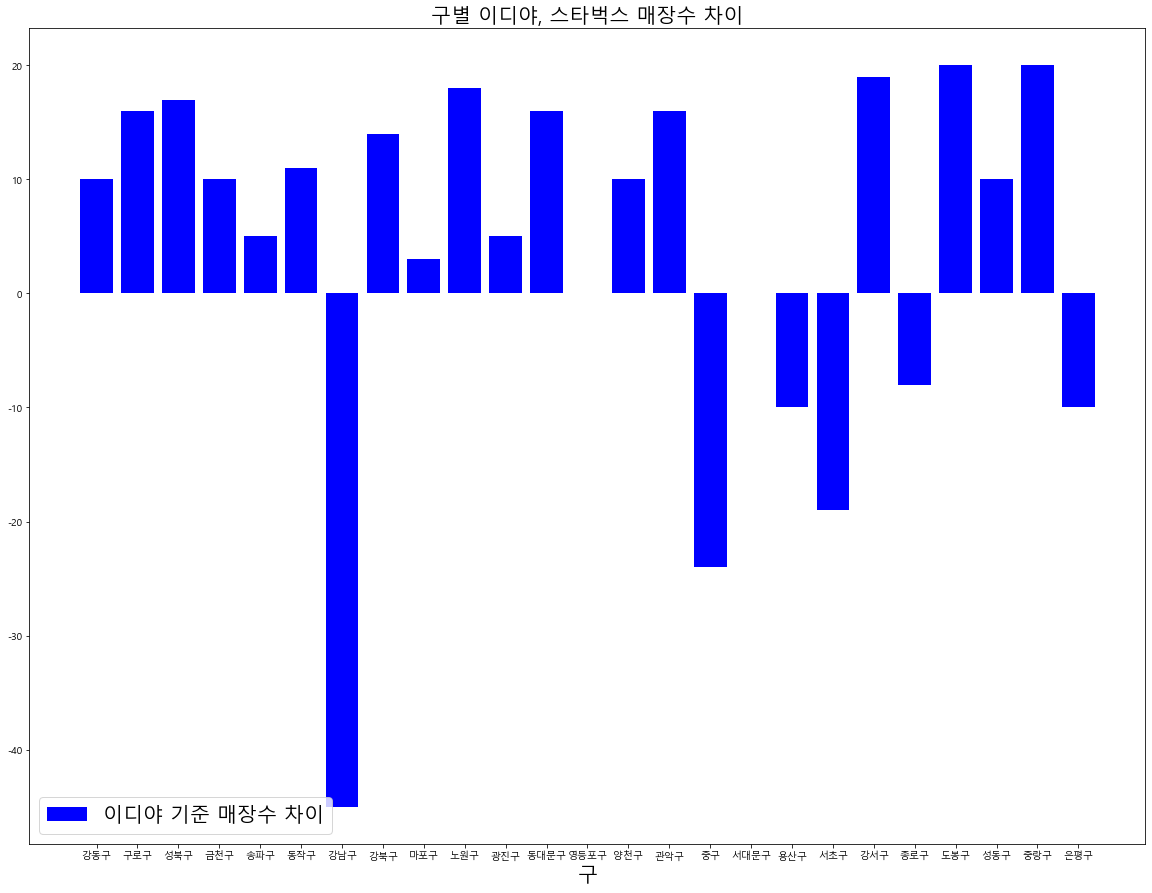

In [30]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()